# Assignment 2—Individual Project Data Analysis

First, load all of the data from the supplied data file 'Witches Data'.
Second, clean data.

In [17]:

import os
import pandas as pd

# Specify the directory where your CSV files are located
folder_path = '..\ArcGIS Online Files'

# Create an empty list to store DataFrames
allData = []

# List all CSV files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('Accused'):
        file_path = os.path.join(folder_path, filename)
        # Load each CSV file into a DataFrame
        df = pd.read_csv(file_path, encoding = "ISO-8859-1")
        
        df.rename(columns={'Longitude': 'Long', 'Latitude': 'Lat'}, inplace=True)
        
        # Append the DataFrame to the list
        allData.append(df)

# Now, dataframes list contains DataFrames of all the CSV files in the folder
# You can access each DataFrame using dataframes[0], dataframes[1], etc.
merged_df = pd.concat(allData, ignore_index=True)

In [18]:
merged_df

,Wikidata Page,Name,Residence,Long,Lat,Gender,Ethnicity,Manner of Death,Occupation,Place of Detainment,Social Classification,Wikipedia Page,Place of Death
0,http://www.wikidata.org/entity/Q43390211,Jonnet McKennan,Balmurrie,-4.805504,54.959995,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q43390291,Jonet Braidheid,Balmakeith,-3.852752,57.580476,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q43390319,Wife of Soirle McAllexander,Isle of Bute,-5.056360,55.835690,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q43390500,Christian Watson,North Berwick,-2.717000,56.058000,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q43390507,Janet Conochie,Bo'ness,-3.608911,56.016811,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,http://www.wikidata.org/entity/Q43390439,Grissell Jaffray,Dundee,-2.970000,56.464000,Female,NaN,Capital Punishment,NaN,Dundee,Middling,https://en.wikipedia.org/wiki/Grissel_Jaffray,Dundee
3181,http://www.wikidata.org/entity/Q43390306,Isobell Young,East Barns,-2.454800,55.978000,Female,NaN,Capital Punishment,NaN,Edinburgh,Middling,https://en.wikipedia.org/wiki/Issobell_Young,Castle Hill
3182,http://www.wikidata.org/entity/Q43389998,Margaret Burges,Cramond,-3.300000,55.966700,Female,NaN,Capital Punishment,NaN,NaN,Middling,https://en.wikipedia.org/wiki/Margaret_Burges,Castle Hill
3183,http://www.wikidata.org/entity/Q43393922,Margaret Fulton,Bearsden,-4.333202,55.919238,Female,NaN,Capital Punishment,NaN,Paisley,Middling,https://en.wikipedia.org/wiki/Paisley_witches,Gallows Green


In [106]:
import pywikibot
import json
import re

COUNTER = 0

def find_p585(data, key="P585"):
    results = []
    

    if isinstance(data, dict):
        for k, v in data.items():
            if k == key:
                results.append(v)
            elif isinstance(v, (dict, list)):
                results.extend(find_p585(v, key))
    elif isinstance(data, list):
        for item in data:
            results.extend(find_p585(item, key))

    return results

def get_witchcraft_investigation(item_id,save=False):
    global COUNTER
    COUNTER+=1
    print(COUNTER)
    
    # Initialize the Pywikibot site
    site = pywikibot.Site("wikidata", "wikidata")
    # Define the Wikidata item you want to retrieve (item_id)
    item = pywikibot.ItemPage(site, item_id)
    
    # Check if the page is a redirect
    if item.isRedirectPage():
        item = item.getRedirectTarget()
    else:
        item.get()
    
    item_json = item.toJSON()
    
    if save:
        # Define the output JSON file name
        output_filename = f"wikidata_item_{item_id}.json"
        # Save the item data as JSON
        with open(output_filename, "w", encoding="utf-8") as json_file:
            json.dump(item_json, json_file, ensure_ascii=False, indent=4)
        print(f"Data saved to {output_filename}")
        
    p585 = find_p585(item_json)
    if len(p585)==1:
        return p585[0][0]['datavalue']['value']['time']
    elif len(p585)==0:
        print("no time")
        return None
    elif len(p585)>0:
        print('more than 1')
        return p585[0][0]['datavalue']['value']['time']


def get_item_id(str):
    pattern = r'Q[0-9]+'
    matches = re.findall(pattern, str)
    return matches[-1]
    

temp = merged_df['Wikidata Page'].apply(get_item_id).apply(get_witchcraft_investigation)
merged_df['investigation_start_time'] = temp

merged_df.to_csv('../Commom/with_investigation_time.csv')

1
2
more than 1
3
4
5
6
7
8
9
10
11
12
13
more than 1
14
15
16
more than 1
17
more than 1
18
19
20
21
more than 1
22
more than 1
23
24
more than 1
25
more than 1
26
more than 1
27
more than 1
28
more than 1
29
more than 1
30
more than 1
31
more than 1
32
more than 1
33
more than 1
34
35
36
37
more than 1
38
more than 1
39
more than 1
40
41
more than 1
42
43
44
45
46
47
48
49
more than 1
50
51
more than 1
52
53
54
55
56
57
58
more than 1
59
60
61
62
more than 1
63
more than 1
64
65
66
67
68
69
more than 1
70
71
72
73
more than 1
74
more than 1
75
76
77
78
79
80
81
82
83
84
more than 1
85
86
87
88
89
more than 1
90
91
more than 1
92
93
94
95
96
more than 1
97
98
99
more than 1
100
101
more than 1
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
more than 1
124
125
126
more than 1
127
128
more than 1
129
more than 1
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
more than 1
148
149
150
more than 1
151
more than 1
152
more tha

In [110]:
merged_df[merged_df['investigation_start_time'].isna()]

,Wikidata Page,Name,Residence,Long,Lat,Gender,Ethnicity,Manner of Death,Occupation,Place of Detainment,Social Classification,Wikipedia Page,Place of Death,investigation_start_time
5,http://www.wikidata.org/entity/Q43392176,Janet Baker,Edinburgh,-3.198889,55.950000,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
233,http://www.wikidata.org/entity/Q43394579,Margaret Balfour,Elgin,-3.315278,57.646389,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
345,http://www.wikidata.org/entity/Q43396009,Scota Bess,Stronsay,-2.600000,59.116667,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
451,http://www.wikidata.org/entity/Q43395145,Janet Hendersoun,Blyth,-3.382777,55.697050,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
483,http://www.wikidata.org/entity/Q43393846,Margaret Comb,Edinburgh,-3.198889,55.950000,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
676,http://www.wikidata.org/entity/Q43394031,Margaret Reid,Kirkcaldy,-3.167369,56.110731,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
774,http://www.wikidata.org/entity/Q43392172,Bessie Carrilie,Twiname Way,-3.572920,55.095803,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1481,http://www.wikidata.org/entity/Q43394570,Lillies Barrie,Leith,-3.170050,55.980100,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1482,http://www.wikidata.org/entity/Q43394577,Margaret Hay,Elgin,-3.315278,57.646389,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1771,http://www.wikidata.org/entity/Q43394593,Katherine Shaw,Kirkcaldy,-3.167369,56.110731,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [108]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikidata Page             3185 non-null   object 
 1   Name                      3185 non-null   object 
 2   Residence                 3185 non-null   object 
 3   Long                      3185 non-null   float64
 4   Lat                       3185 non-null   float64
 5   Gender                    3168 non-null   object 
 6   Ethnicity                 11 non-null     object 
 7   Manner of Death           274 non-null    object 
 8   Occupation                121 non-null    object 
 9   Place of Detainment       506 non-null    object 
 10  Social Classification     357 non-null    object 
 11  Wikipedia Page            25 non-null     object 
 12  Place of Death            148 non-null    object 
 13  investigation_start_time  3168 non-null   object 
dtypes: float

In [42]:
print(merged_df.columns)

Index(['Wikidata Page', 'Name', 'Residence', 'Long', 'Lat', 'Gender',
       'Place of Detainment', 'Social Classification', 'Wikipedia Page',
       'Manner of Death', 'Ethnicity', 'Occupation', 'Place of Death',
       'CivilParish1930Code', 'CivilParish1930Name', 'Number'],
      dtype='object')


In [38]:
print(merged_df.head())

                              Wikidata Page                         Name  \
0  http://www.wikidata.org/entity/Q43390211              Jonnet McKennan   
1  http://www.wikidata.org/entity/Q43390291              Jonet Braidheid   
2  http://www.wikidata.org/entity/Q43390319  Wife of Soirle McAllexander   
3  http://www.wikidata.org/entity/Q43390500             Christian Watson   
4  http://www.wikidata.org/entity/Q43390507               Janet Conochie   

       Residence      Long        Lat  Gender Place of Detainment  \
0      Balmurrie -4.805504  54.959995  Female                 NaN   
1     Balmakeith -3.852752  57.580476  Female                 NaN   
2   Isle of Bute -5.056360  55.835690  Female                 NaN   
3  North Berwick -2.717000  56.058000  Female                 NaN   
4        Bo'ness -3.608911  56.016811  Female                 NaN   

  Social Classification Wikipedia Page Manner of Death Ethnicity Occupation  \
0                   NaN            NaN           

In [43]:
for value in merged_df['Wikipedia Page']:
    print(value)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


# Describe

tell us about the data that you have. We expect to see:

* What is the general type of the data (tabular, network, geographical, textual etc.)
* What fields and data types are present (max/min, levels for categorical values).
* Summary statistics about the data - how many people, what time frame, field averages etc.
* How does the data relate to the questions that the data owner has discussed with you?

In [ ]:
# What is the general type of the data:
# The general data type is tabular

In [7]:
# What fields and data types are present:
# The data fields are:

print(merged_df.columns)

# Numerical data type: Longitude, Latitude

Index(['Wikidata Page', 'Name', 'Residence', 'Longitude', 'Latitude', 'Gender',
       'Place of Detainment', 'Social Classification', 'Wikipedia Page',
       'Manner of Death', 'Ethnicity', 'Occupation', 'Place of Death',
       'CivilParish1930Code', 'CivilParish1930Name', 'Number', 'Long', 'Lat'],
      dtype='object')


In [19]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Wikidata Page          3185 non-null   object 
 1   Name                   3185 non-null   object 
 2   Residence              3185 non-null   object 
 3   Long                   3185 non-null   float64
 4   Lat                    3185 non-null   float64
 5   Gender                 3168 non-null   object 
 6   Ethnicity              11 non-null     object 
 7   Manner of Death        274 non-null    object 
 8   Occupation             121 non-null    object 
 9   Place of Detainment    506 non-null    object 
 10  Social Classification  357 non-null    object 
 11  Wikipedia Page         25 non-null     object 
 12  Place of Death         148 non-null    object 
dtypes: float64(2), object(11)
memory usage: 323.6+ KB
None


In [24]:
merged_df[merged_df['Wikidata Page'].isna()]
merged_df['Name'].value_counts()
# merged_df[merged_df['Name']=='Margaret Young']

Margaret Young              5
Margaret Watson             5
Margaret Wallace            5
Margaret Dalgleish          4
Margaret Reid               4
                           ..
Mareoun                     1
Mother of William Allane    1
Marion Hopkirk              1
Agnes Mertene               1
Agnes Naismith              1
Name: Name, Length: 2932, dtype: int64

In [9]:
print(merged_df.describe())

         Longitude     Latitude  CivilParish1930Code      Number         Long  \
count  3185.000000  3185.000000           871.000000  871.000000  1351.000000   
mean     -3.313340    56.264200           436.000000    3.469575    -3.313387   
std       0.778236     0.898503           251.580338   10.051073     0.731439   
min      -6.816667    54.803973             1.000000    0.000000    -7.319640   
25%      -3.658585    55.861500           218.500000    0.000000    -3.618880   
50%      -3.167369    55.956120           436.000000    0.000000    -3.170050   
75%      -2.783320    56.311800           653.500000    2.000000    -2.867350   
max      -0.866667    60.800000           871.000000  149.000000    -1.266667   

               Lat  
count  1351.000000  
mean     56.170256  
std       0.765828  
min      54.771000  
25%      55.854400  
50%      55.951700  
75%      56.218700  
max      60.303800  


In [ ]:
# Summary statistics about the data - how many people, what time frame, field averages etc.


# Explore

carry out a deeper exploration of the data. This includes looking at individual
fields/variables to see the distribution of values they take (e.g. evenly distributed, bell curves, bi-modal) or how they are distributed in time. It also includes relationships between variables in your dataset: are there correlations? In which direction? Complex curves? We would expect to see roughly:

* 3 exploratory visualisations, presented in a readable form, with an explanation about what you have found
* Description and interpretation about what you see in the visualizations, e.g., trends, outliers, clusters.

# Reflect and Hypotheses

What do you think might be behind the relationships and distributions that you have found? How does your data relate to the world? In short, what hypotheses came up as you explored the data, and how would you go about testing them? We would expect to see:

3 hypotheses with an explanation of:
* What your hypothesis is
* why you think that (referring to your graphs)
* How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..)

First, I am removing all of the negative and unrealistic bill and tip from the data. This is because bill and tip cannot be negative or far exceed a reasonable range.

In [4]:
# Cleaning code goes in here
# Since I have gone through all of the numbers in column 'total_bill' and 'tip', 
# the wrong number appear in the same row,
# so I only use column 'total_bill' to check the value then remove from data
data1=data[(data['total_bill']>0)&(data['total_bill']<100)]
# but for the interest of caution, I can also check both 'total_bill' and 'tip'
#data1=data[(data['total_bill']>0)&(data['total_bill']<100)&(data['tip']>0)&(data['tip']<100)]


# To check whether all of the total bill in cleaned data1 is within the range 0-100 
assert ((data1['total_bill'] >= 0) & (data1['total_bill'] <= 100)).all(),'total_ball should be within the range of 0-100'

data1.reset_index(drop=True,inplace=True)

# To see a sample within the range of the modified rows
data1.iloc[135:170,:]

,total_bill,tip,sex,smoker,day,time,size
135,8.51,1.25,Female,No,Thursday,Lunch,2
136,10.33,2.00,Female,No,Thursday,Lunch,2
137,14.15,2.00,Female,No,Thursday,Lunch,2
138,13.16,2.75,Female,No,Thursday,Lunch,2
139,17.47,3.50,Female,No,Thursday,Lunch,2
140,34.30,6.70,Male,No,Thursday,Lunch,6
141,41.19,5.00,Male,No,Thursday,Lunch,5
142,27.05,5.00,Female,No,Thursday,Lunch,6
143,16.43,2.30,Female,No,Thursday,Lunch,2
144,8.35,1.50,Female,No,Thursday,Lunch,2


Next, I am changing all of the 'Lady' to 'Female', 'Man' to 'Male', and 'Thursday' to 'Thur'.

In [19]:
# More cleaning code goes in here
data1['sex'] = data1['sex'].replace({'Lady': 'Female'})
data1['sex'] = data1['sex'].replace({'Man': 'Male'})
data1['day'] = data1['day'].replace({'Thursday': 'Thur'})

# To check whether all of the str in column 'sex' are Female or Male
assert ((data1['sex'] == 'Female') | (data1['sex'] == 'Male')).all(),'Sex should be either Male or Female'
assert (data1['day'] != 'Thursday').all(),'Day should be same format of discription'

# To see a sample within the range of the modified rows
# data1.iloc[183:190]
data1.iloc[116:149]

/tmp/ipykernel_139/690076725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sex'] = data1['sex'].replace({'Lady': 'Female'})
/tmp/ipykernel_139/690076725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sex'] = data1['sex'].replace({'Man': 'Male'})
/tmp/ipykernel_139/690076725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,total_bill,tip,sex,smoker,day,time,size
116,29.93,5.07,Male,No,Sun,Dinner,4
117,10.65,1.50,Female,No,Thur,Lunch,2
118,12.43,1.80,Female,No,Thur,Lunch,2
119,24.08,2.92,Female,No,Thur,Lunch,4
120,11.69,2.31,Male,No,Thur,Lunch,2
121,13.42,1.68,Female,No,Thur,Lunch,2
122,14.26,2.50,Male,No,Thur,Lunch,2
123,15.95,2.00,Male,No,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
125,29.80,4.20,Female,No,Thur,Lunch,6


Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. Make sure each assert explains why it is there. You should have several asserts, for all of the things that you found in the data that were strange.

In [ ]:
assert 3 > 2, "Larger numbers should be greater than smaller numbers" 
assert 2 > 3, "This assert should fail - take it out of your notebook"

# Simple Statistical Questions
For each of these, we want a command that just prints the relevant answer. The first one has been filled out as an example


How many rows are in the dataset after cleaning?

In [7]:
data1.shape[0] # Simply count the number of rows using shape, and select the first element

242

What is the total amount of tips given?

In [20]:
import numpy as np

# I got 727.3399999999999 due to floating-point precision in Python,
# so I use round() to control the number of decimal places
totalTip=round(np.sum(data1['tip']),2) 
print(f"Total tip amount: {totalTip}")

Total tip amount: 727.34


What is the largest group?

In [21]:
maxGroup = np.max(data1['size'])
print(f"The largest group size: {maxGroup}")

The largest group size: 6


How many bills were paid by males, and how many by females?

In [22]:
malePaid = (data1['sex'] == 'Male').sum()
print(f"{malePaid} bills were paid by males")

femalePaid = (data1['sex'] == 'Female').sum()
print(f"{femalePaid} bills were paid by females")

155 bills were paid by males
87 bills were paid by females


What is the average percentage of the bill that people add as a tip?

In [23]:
meanTipPercent = round(np.mean(data1['tip']/data['total_bill'])*100, 2)
print(f"the average percentage of the bill that people add as a tip is: {meanTipPercent}%")

the average percentage of the bill that people add as a tip is: 16.58%


What is the largest tip?

In [24]:
maxTip = np.max(data1['tip'])
print(f"The largest tip: {maxTip}")

The largest tip: 10.0


What day of the week was the largest tip given on?

In [27]:
# I am confused with this question so I provide all of the solutions:

# Solution 1: The largest tip refers to the largest one tip is given on which day
row_with_largest_tip = data1[data1['tip'] == data1['tip'].max()]

# Extract the 'day' value from the row
day_for_largest_tip1 = row_with_largest_tip['day'].values[0]

print(f"Solution 1: The day for the largest tip is: {day_for_largest_tip1}")

# Solotion 2: The largest tip refers to the sum of tips received is largest on which day
thurData = data1[data1['day']=='Thur']
tipThur = round(thurData['tip'].sum(), 2)

friData = data1[data1['day']=='Fri']
tipFri = round(thurData['tip'].sum(), 2)

satData = data1[data1['day']=='Sat']
tipSat = round(thurData['tip'].sum(), 2)

sunData = data1[data1['day']=='Sun']
tipSun = round(thurData['tip'].sum(), 2)

if np.max([tipThur, tipFri, tipSat, tipSun]) == tipThur:
    day_for_largest_tip2 = 'Thur'
elif np.max([tipThur, tipFri, tipSat, tipSun]) == tipFri:
    day_for_largest_tip2 = 'Fri'
elif np.max([tipThur, tipFri, tipSat, tipSun]) == tipSat:
    day_for_largest_tip2 = 'Sat'
elif np.max([tipThur, tipFri, tipSat, tipSun]) == tipSun:
    day_for_largest_tip2 = 'Sun'
else:
    day_for_largest_tip2 = 'Something wrong!'
    
print(f"Solution 2: The day for the largest tip is: {day_for_largest_tip2}")

Solution 1: The day for the largest tip is: Sat
Solution 2: The day for the largest tip is: Thur


Do males or females give more tips as an average of the bill? What is the difference?

In [36]:
row_with_female = data1[data1['sex']=='Female']
meanTipPercent_female = round(np.mean(row_with_female['tip'] / row_with_female['total_bill'])*100,2)
assert meanTipPercent_female > 0, 'Female avg tip percent should > 0' 
assert meanTipPercent_female < 100, 'Female avg tip percent should < 100'

row_with_male = data1[data1['sex']=='Male']
meanTipPercent_male = round(np.mean(row_with_male['tip'] / row_with_male['total_bill'])*100,2)
assert meanTipPercent_male > 0, 'Male avg tip percent should > 0'
assert meanTipPercent_male < 100, 'Male avg tip percent should < 100'

if meanTipPercent_female > meanTipPercent_male:
    more_tip_avg = 'Female'
elif meanTipPercent_female == meanTipPercent_male:
    more_tip_avg = 'Both'
else:
    more_tip_avg = 'Male'
    
diff = round(np.abs(meanTipPercent_female - meanTipPercent_male), 2)


# print(meanTipPercent_female)
# print(meanTipPercent_male)
print(f"{more_tip_avg} give more tips as an average of the bill")
print(f"{more_tip_avg} give {diff}% more tips as an average of the bill")

Female give more tips as an average of the bill
Female give 0.83% more tips as an average of the bill


Do smokers tip more at lunchtime than at dinnertime?

In [37]:
# Create two dataframe, one for lunch smokers, the other for dinner smokers
lunchSmokerData = data1[(data1['smoker'] == 'Yes') & (data1['time'] == 'Lunch')].reset_index(drop=True)
dinnerSmokerData = data1[(data1['smoker'] == 'Yes') & (data1['time'] == 'Dinner')].reset_index(drop=True)

# I consider this question only ask for the tip amount instead of tips as an average of the bill
tip_total_for_lunch = round(np.sum(lunchSmokerData['tip']), 2)
tip_total_for_dinner = round(np.sum(dinnerSmokerData['tip']), 2)

if tip_total_for_lunch > tip_total_for_dinner:
    print('Smokers tip more at lunchtime.')
elif tip_total_for_lunch == tip_total_for_dinner:
    print('Smokers tip at lunchtime is same to tip at dinnertime.')
else:
    print('Smokers tip more at Dinnertime')

Smokers tip more at Dinnertime


# Graphs
For all these questions, use a graph to illustrate your answer

What is the distribution of tips, and what is the distribution of total bills (plot on separate graphs). Hint: distplot

/tmp/ipykernel_139/1162177108.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  tipChart = sns.distplot(data1['tip'])


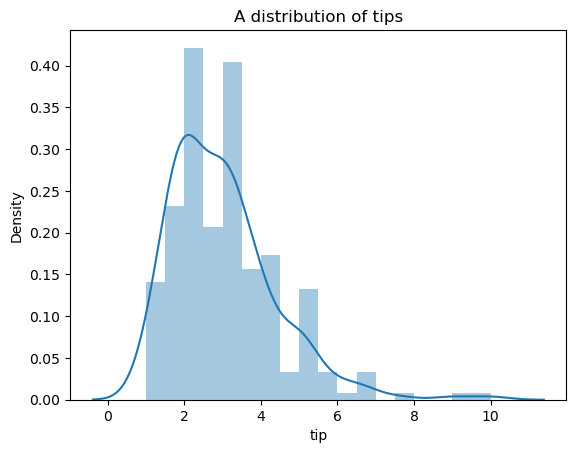

In [40]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# distribution of tips
tipChart = sns.distplot(data1['tip'])
tipChart.set_title('A distribution of tips')
plt.show()

/tmp/ipykernel_139/2400369024.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  tipChart = sns.distplot(data1['total_bill'])


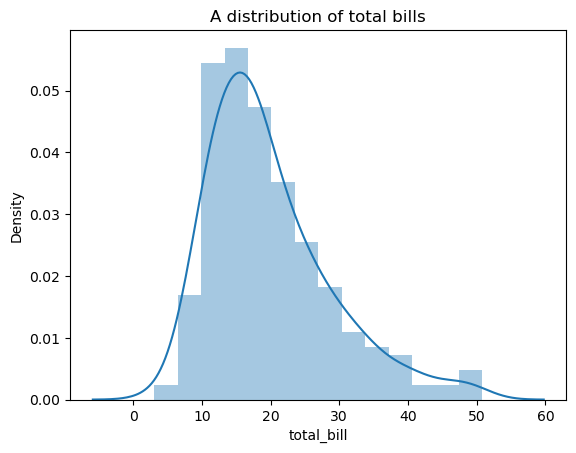

In [43]:
# distribution of total bills
billChart = sns.distplot(data1['total_bill'])
billChart.set_title('A distribution of total bills')

plt.show()

Now plot them on the *same* plot, and add a legend. Hint: use attribute 'label' to give them names, and call legend() on one of the plots to draw the legend

/tmp/ipykernel_139/1678880860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['tip'])
/tmp/ipykernel_139/1678880860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['total_bill'])
No artists with labels found to put in legend.  Note that artists whose label start with an under

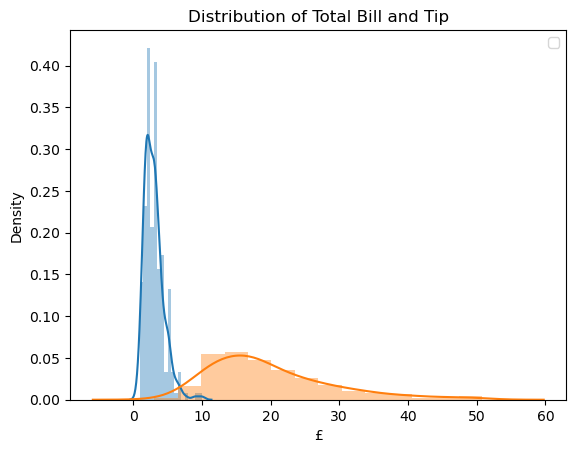

In [47]:
sns.distplot(data1['tip'])
sns.distplot(data1['total_bill'])

plt.legend()
plt.xlabel('£')
# plt.ylabel('Y-axis Label')
plt.title('Distribution of Total Bill and Tip')

plt.show()

Do people give different average tips on different days? (Have you calculated this relative to the size of the bill, or just the tip amount?) Hint: boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


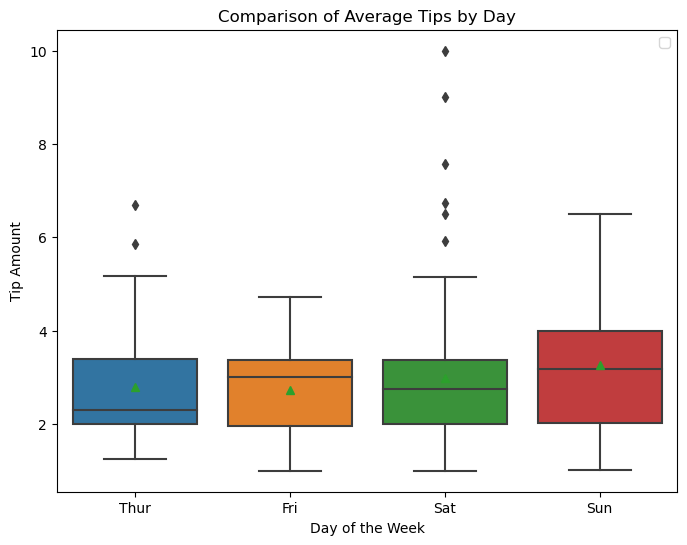

In [74]:
#Solution 1: Just the tip amount
plt.figure(figsize=(8, 6))

sns.boxplot(x='day', y='tip', data=data1, showmeans=True, order=["Thur", "Fri", "Sat", "Sun", ])

plt.title('Comparison of Average Tips by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


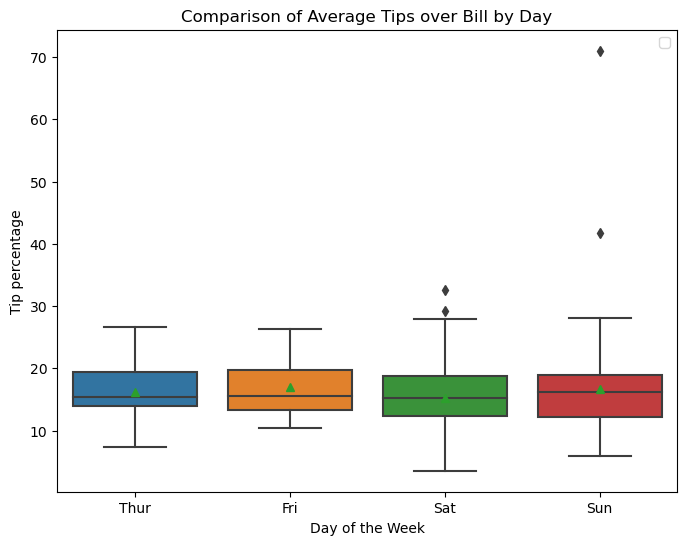

In [75]:
#Solution 2: Relative to the size of the bill
# data1=data1.drop('newcolumn', axis = 1)
# data1=data1.drop('tip_bill_percent', axis = 1)
# data1['tip_bill_percent']=round(data1.tip/data1.total_bill*100, 2)
# data1

plt.figure(figsize=(8, 6))

sns.boxplot(x='day', y='tip_bill_percent', data=data1, showmeans=True, order=["Thur", "Fri", "Sat", "Sun"])

plt.title('Comparison of Average Tips over Bill by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip percentage')

plt.legend()
plt.show()

How does the size of the tip relate to the size of the bill? Hint: scatterplot, lmplot

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


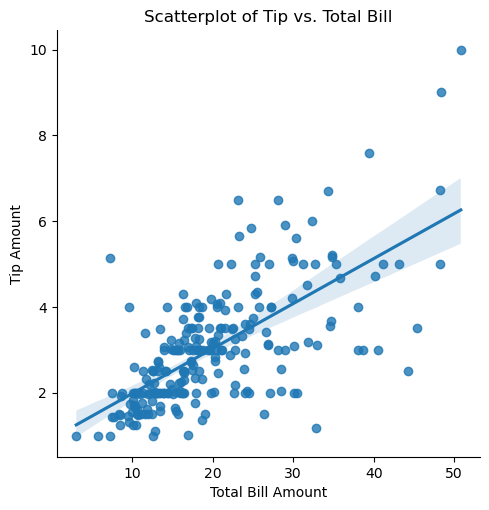

In [83]:
#

sns.lmplot(x='total_bill', y='tip', data=data1)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='total_bill', y='tip', data=data1)

# Set labels and a title
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.title('Scatterplot of Tip vs. Total Bill')

plt.show()

Does the proportion of the bill given as a tip relate to the number of people eating?

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


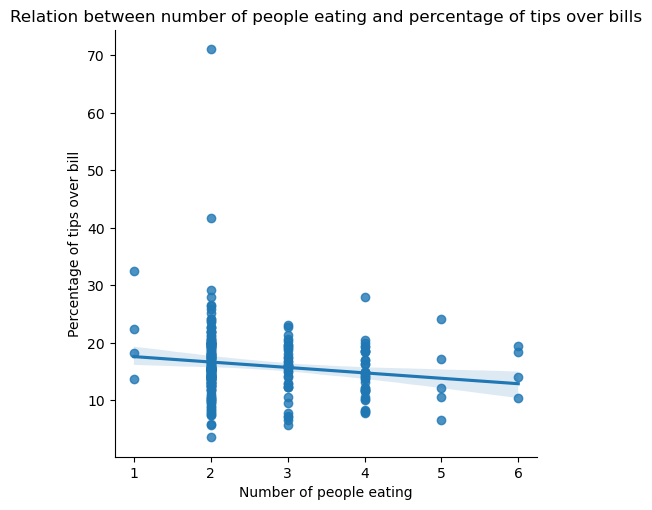

In [86]:
# As shown in graph, 
# proportion of the bill given as a tip has a linear relation to the number of people eating,
# the more number of people eating the less tips percentage over total bill is given.

sns.lmplot(x='size', y='tip_bill_percent', data=data1)

plt.ylabel('Percentage of tips over bill')
plt.xlabel('Number of people eating')
plt.title('Relation between number of people eating and percentage of tips over bills')

plt.show()

Bonus Question: Create a boxplot showing total bills and tips for each day next to each other in a different colour.

Hint: use melt (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) to reshape the data, so that you have new dataset, with a column for the day, a column for the amount, and a type column that says whether it is a total_bill or a tip. Then you can boxplot that, and use the type column to set the color.

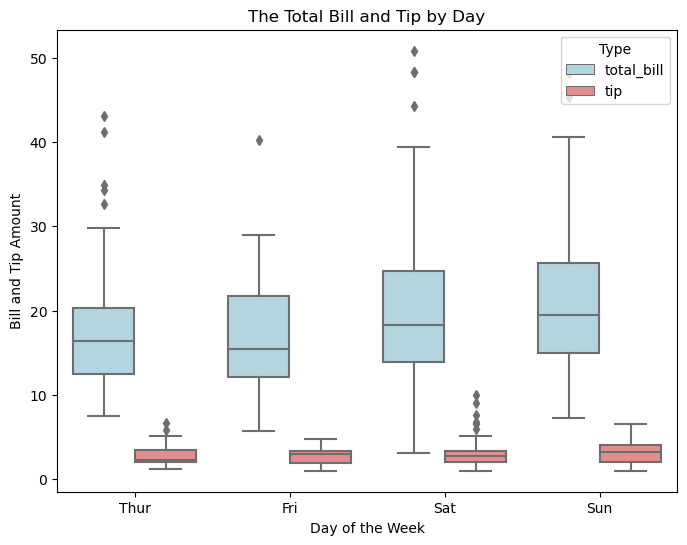

In [100]:
meltedData = pd.melt(data1, id_vars=['day'], value_vars=['total_bill', 'tip'], var_name='type', value_name='amount')

# Create a boxplot with different colors
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='amount', hue='type', data=meltedData, order=["Thur", "Fri", "Sat", "Sun"], palette={'total_bill': 'lightblue', 'tip': 'lightcoral'})

plt.xlabel('Day of the Week')
plt.ylabel('Bill and Tip Amount')
plt.title('The Total Bill and Tip by Day')

plt.legend(title='Type', loc='upper right')

plt.show()

# Open Question
Use 2 graphs and associated text to explain something else that you have found in the data. Try to relate it to causes, i.e. explain *why* the data might be this way.

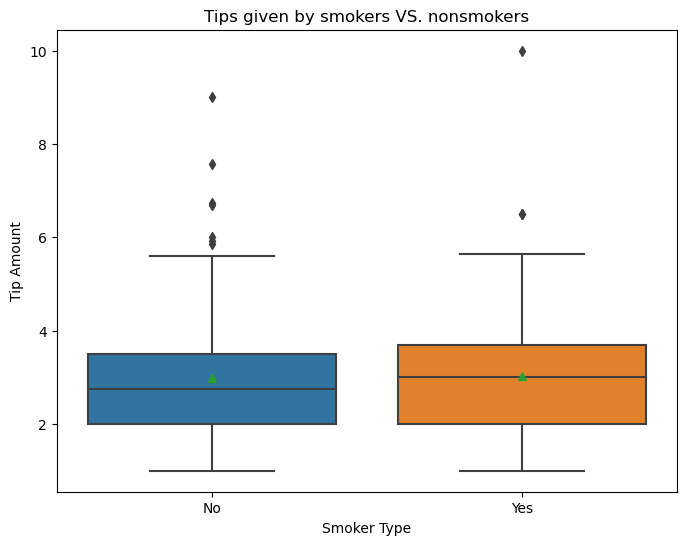

In [103]:
# Do smokers tips more compare to nonsmokers?
# Referring to the boxplot below, smokers and nonsmokers give relatively similar amount of the tips.
# I chose boxplot because I want to see smoker and nonsmoker's data side by side in comparsion, boxplot comparing multiple groups.
plt.figure(figsize=(8, 6))

sns.boxplot(x='smoker', y='tip', data=data1, showmeans=True)

plt.title('Tips given by smokers VS. nonsmokers')
plt.xlabel('Smoker Type')
plt.ylabel('Tip Amount')

plt.show()

/tmp/ipykernel_139/1149222593.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lunchData['size'], label='Lunch', color='lightblue')
/tmp/ipykernel_139/1149222593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dinnerData['size'], label='Dinner', color='lightcoral')


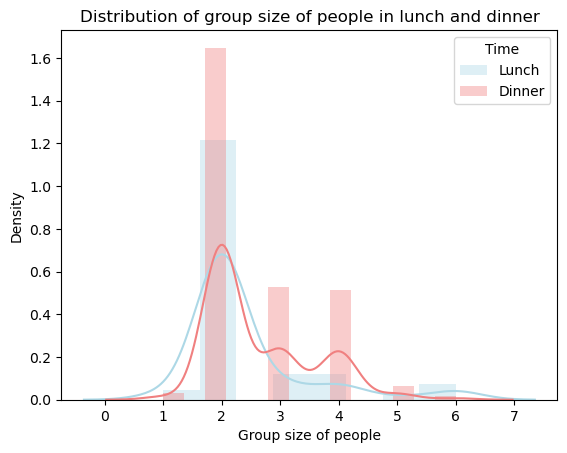

In [109]:
# Does dinner time served larger group size than lunch?
# As shown in the graph below, the restaurant served more groups with size 2~5 at dinner time than lunch time.
# I chose overlay histogram because it can best visulizing the density of a certain size of a group.


lunchData = data1[data1['time']=='Lunch']
dinnerData = data1[data1['time']=='Dinner']

sns.distplot(lunchData['size'], label='Lunch', color='lightblue')
sns.distplot(dinnerData['size'], label='Dinner', color='lightcoral')

plt.legend(title='Time', loc='upper right')


plt.title('Distribution of group size of people in lunch and dinner')
plt.xlabel('Group size of people')

plt.show()

# Reflection
Write up to 100 words about your experience and what you have learnt：

By exercising through each week's notebook and assignment 1, I have learned the basic framework of Python that how to analyze and visualize data. By using panda, numpy, seaborn, matplotlib, and more, I experienced how powerful, valuable, and efficient Python is in analyzing large datasets, and also helped me recall the knowledge of statistics. For example, I have learned how to modify data in order to adapt different scenarios by utilising various functional techniques. Especially from plotting boxplots, scatterplots, and implots. Four weeks of practice reinformed and furthered my understanding of interpreting and communicating complex data in a more effective way.